In [1]:
import json
import re

This loads the dataset from the json files

In [2]:
# Load dataset json
data = []
with open('data/train.json', 'r') as file:
    for line in file:
        if line.strip():  # Skip empty lines
            data.append(json.loads(line))

# Now data is a list of dictionaries, each containing one record
print(f"Loaded {len(data)} records")

# Remove entries that contain the sequence "Ce" in the "Skeleton" key
data = [record for record in data if "Ce" not in record["Skeleton"]]

# Print the number of records after removal
print(f"Number of records after removal: {len(data)}")

Loaded 498795 records
Number of records after removal: 496995


## ChatGPT Generated Code
Takes imported dictionary, converts equations to reverse polish notation strings, and store the reverse polish notation strings in a seperate dictionary column

In [3]:
# Define the functions we expect to see.
FUNCTIONS = {"sin", "cos", "exp", "log"}

# Define operators with their precedence and associativity.
OPERATORS = {
    '+': {'precedence': 2, 'associativity': 'left'},
    '-': {'precedence': 2, 'associativity': 'left'},
    '*': {'precedence': 3, 'associativity': 'left'},
    '/': {'precedence': 3, 'associativity': 'left'},
    '**': {'precedence': 4, 'associativity': 'right'},
}

def tokenize(expression):
    """
    Tokenizes the expression into numbers, variables, functions, operators, and parentheses.
    Supports multi-character operators like "**".
    """
    token_pattern = r'\d+\.\d+|\d+|[A-Za-z_][A-Za-z0-9_]*|\*\*|[+\-*/()]'
    tokens = re.findall(token_pattern, expression)
    return tokens

def infix_to_rpn(expression):
    """
    Converts an infix expression string to its Reverse Polish Notation (RPN) equivalent.
    """
    output = []
    stack = []
    tokens = tokenize(expression)
    
    for token in tokens:
        # If the token is a number or variable/identifier.
        if re.match(r'\d+(\.\d+)?$', token) or re.match(r'[A-Za-z_][A-Za-z0-9_]*$', token):
            # If the token is a recognized function, push it onto the stack.
            if token in FUNCTIONS:
                stack.append(token)
            else:
                output.append(token)
        elif token == ',':
            # Function argument separator: pop until '('.
            while stack and stack[-1] != '(':
                output.append(stack.pop())
        elif token in OPERATORS:
            # Operator: pop higher precedence operators from the stack.
            while (stack and stack[-1] in OPERATORS and
                   ((OPERATORS[token]['associativity'] == 'left' and OPERATORS[token]['precedence'] <= OPERATORS[stack[-1]]['precedence']) or
                    (OPERATORS[token]['associativity'] == 'right' and OPERATORS[token]['precedence'] < OPERATORS[stack[-1]]['precedence']))):
                output.append(stack.pop())
            stack.append(token)
        elif token == '(':
            stack.append(token)
        elif token == ')':
            # Pop until the matching '('.
            while stack and stack[-1] != '(':
                output.append(stack.pop())
            if stack and stack[-1] == '(':
                stack.pop()  # Remove the '('
            # If a function is on top of the stack, pop it to output.
            if stack and stack[-1] in FUNCTIONS:
                output.append(stack.pop())
    
    # Pop any remaining operators from the stack.
    while stack:
        output.append(stack.pop())
        
    return " ".join(output)

# Process each record: convert the single-string "Skeleton" equation to RPN.
for record in data:
    if "Skeleton" in record:
        skeleton_expr = record["Skeleton"]
        rpn_expr = infix_to_rpn(skeleton_expr)
        record["RPN"] = rpn_expr

In [4]:
##Test the RPN conversion by printing the first 20 records
for idx, record in enumerate(data[:20], 1):
    print(f"\nRecord {idx}:")
    print("Skeleton:")
    print(record["Skeleton"])
    print("RPN:")
    print(record["RPN"])
    
    #print the length of x and y
    print("Length of x and y:")
    print(len(record["X"]))
    print(len(record["Y"]))


Record 1:
Skeleton:
C*cos(C*x1)+C
RPN:
C C x1 * cos * C +
Length of x and y:
30
30

Record 2:
Skeleton:
C*cos(C*x1)+C
RPN:
C C x1 * cos * C +
Length of x and y:
30
30

Record 3:
Skeleton:
C*cos(C*x1)+C
RPN:
C C x1 * cos * C +
Length of x and y:
30
30

Record 4:
Skeleton:
C*cos(C*x1)+C
RPN:
C C x1 * cos * C +
Length of x and y:
30
30

Record 5:
Skeleton:
C*cos(C*x1)+C
RPN:
C C x1 * cos * C +
Length of x and y:
30
30

Record 6:
Skeleton:
C*cos(C*x1)+C
RPN:
C C x1 * cos * C +
Length of x and y:
30
30

Record 7:
Skeleton:
C*cos(C*x1)+C
RPN:
C C x1 * cos * C +
Length of x and y:
30
30

Record 8:
Skeleton:
C*cos(C*x1)+C
RPN:
C C x1 * cos * C +
Length of x and y:
30
30

Record 9:
Skeleton:
C*cos(C*x1)+C
RPN:
C C x1 * cos * C +
Length of x and y:
30
30

Record 10:
Skeleton:
C*cos(C*x1)+C
RPN:
C C x1 * cos * C +
Length of x and y:
30
30

Record 11:
Skeleton:
C*cos(C*x1)+C
RPN:
C C x1 * cos * C +
Length of x and y:
30
30

Record 12:
Skeleton:
C*cos(C*x1)+C
RPN:
C C x1 * cos * C +
Length of x an

## These functions were tested for the evaluation part of the pipeline, showing we can import an RPN string, fit the constants C1 C2... using SciPy, and evaluate and plot the expression numerically.  Generated using Clause 3.7 Sonnet Thinking

/tmp/ipykernel_12530/165020110.py:73: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  stack.append(math.cos(a))


Fitted Parameters: {'C_0': np.float64(-0.2864981794359968), 'C_1': np.float64(-1.7469460765122937), 'C_2': np.float64(0.8778656541960346)}


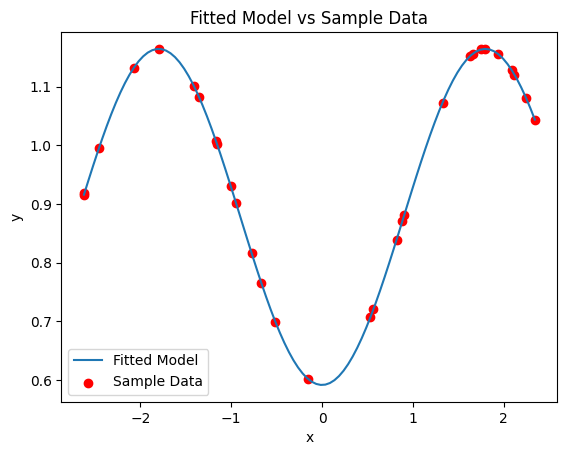

Original RPN Expression:
C C x1 * cos * C +
Fitted RPN Expression:
C_0 C_1 x1 * cos * C_2 +
Original Skeleton Expression:
C*cos(C*x1)+C
Fitted Parameters:
{'C_0': np.float64(-0.2864981794359968), 'C_1': np.float64(-1.7469460765122937), 'C_2': np.float64(0.8778656541960346)}


In [5]:
import math
import re
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.optimize import differential_evolution #For global minimization, as the constant solver was having issues with local minima
import multiprocessing

# --- Utility: Uniquify Constant Tokens in the RPN Expression ---

def uniquify_rpn_constants(rpn_expr):
    """
    Replace each occurrence of "C" in the RPN expression with a unique constant name.
    For example:
      "C C x1 * C + sin * C +"
    becomes:
      "C_0 C_1 x1 * C_2 + sin * C_3 +"
    Returns the new expression and the total number of constants.
    """
    tokens = rpn_expr.split()
    new_tokens = []
    count = 0
    for token in tokens:
        if token == "C":
            new_tokens.append(f"C_{count}")
            count += 1
        else:
            new_tokens.append(token)
    new_expr = " ".join(new_tokens)
    return new_expr, count

# --- Tokenization and RPN Evaluation with Parameters ---

def tokenize(expression):
    token_pattern = r'\d+\.\d+|\d+|[A-Za-z_][A-Za-z0-9_]*|\*\*|[+\-*/()]'
    tokens = re.findall(token_pattern, expression)
    return tokens

def evaluate_rpn_with_params(rpn_expr, x_value, params):
    """
    Evaluate the RPN expression for a given x_value and a dictionary of constant parameters.
    - 'x1' is replaced with x_value.
    - Tokens matching the pattern 'C_<number>' are replaced with their corresponding value from params.
    - Recognized functions: sin, cos, exp, log.
    - Operators: +, -, *, /, **.
    """
    tokens = rpn_expr.split()
    stack = []
    for token in tokens:
        # Try interpreting token as a number.
        try:
            stack.append(float(token))
            continue
        except ValueError:
            pass
        
        # Substitute variable.
        if token == 'x1':
            stack.append(x_value)
        # Substitute unique constant (e.g., "C_0", "C_1", etc.)
        elif re.match(r'C_\d+', token):
            if token in params:
                stack.append(params[token])
            else:
                raise ValueError(f"Parameter {token} not found in params.")
        # Functions.
        elif token in {"sin", "cos", "exp", "log"}:
            a = stack.pop()
            if token == "sin":
                stack.append(math.sin(a))
            elif token == "cos":
                stack.append(math.cos(a))
            elif token == "exp":
                stack.append(math.exp(a))
            elif token == "log":
                if a <= 0:
                    raise ValueError("Logarithm argument must be positive.")
                stack.append(math.log(a))
        # Binary operators.
        elif token in {"+", "-", "*", "/", "**"}:
            b = stack.pop()
            a = stack.pop()
            if token == "+":
                stack.append(a + b)
            elif token == "-":
                stack.append(a - b)
            elif token == "*":
                stack.append(a * b)
            elif token == "/":
                stack.append(a / b)
            elif token == "**":
                stack.append(a ** b)
        else:
            raise ValueError("Unknown token: " + token)
    if len(stack) != 1:
        raise ValueError("RPN evaluation did not result in a single output.")
    return stack[0]

def extract_constant_names(rpn_expr):
    """
    Extracts the list of unique constant names (e.g., ["C_0", "C_1", ...])
    from the RPN expression. Since our uniquify function gives each "C" a unique name,
    the constants appear in order.
    """
    tokens = rpn_expr.split()
    constants = [token for token in tokens if re.match(r'C_\d+', token)]
    return constants

def model_predictions(rpn_expr, x_data, params):
    """
    Evaluate the RPN model on an array of x_data given a dictionary of parameters.
    Returns a numpy array of predictions.
    """
    preds = []
    for x in x_data:
        try:
            preds.append(evaluate_rpn_with_params(rpn_expr, x, params))
        except Exception:
            preds.append(np.nan)
    return np.array(preds)

# --- Constant Fitting Function ---

def fit_constants(original_rpn_expr, X_data, Y_data):
    """
    Fits the distinct constants in the RPN expression (each "C" is independent)
    so that the model predictions best match Y_data.
    Uses SciPy's L-BFGS-B optimization (minimizing sum of squared errors) with bounds.
    
    Returns:
      - The new RPN expression with unique constant names.
      - A dictionary mapping each unique constant (e.g., "C_0", "C_1", ...) to its fitted value.
    """
    # Convert the original RPN expression to one with unique constants.
    unique_rpn_expr, n_constants = uniquify_rpn_constants(original_rpn_expr)
    constant_names = extract_constant_names(unique_rpn_expr)
    
    # Initial guess for each constant: 1.0
    initial_guess = np.ones(len(constant_names))
    
    # Bounds for each constant: [-2.1, 2.1]
    bounds = [(-2.1, 2.1)] * len(constant_names)
    
    def objective(param_vector):
        params = {name: value for name, value in zip(constant_names, param_vector)}
        predictions = model_predictions(unique_rpn_expr, X_data, params)
        # Return a large penalty if any prediction failed.
        if np.isnan(predictions).any():
            return 1e10
        error = np.sum((predictions - Y_data)**2)
        return error
    
    # Minimize using L-BFGS-B with bounds.
    #result = minimize(objective, initial_guess, method='L-BFGS-B', bounds=bounds)
    result = differential_evolution(objective, bounds, tol=1e-4,maxiter=10) #Do limited global minimization search
    #Refine with local minimization search
    result = minimize(objective, result.x, method='L-BFGS-B', bounds=bounds)
    fitted_params = {name: value for name, value in zip(constant_names, result.x)}
    return unique_rpn_expr, fitted_params

# --- Process and Plot Function ---

def process_and_plot(record):
    """
    Processes a single record by:
      - Extracting "X" and "Y" sample data.
      - Creating an evenly spaced array of 100 points between min(X) and max(X).
      - Fitting the constants in the RPN equation (where each "C" is unique) using L-BFGS-B regression with bounds.
      - Evaluating the fitted model on the 100 points.
      - Plotting the fitted function (line) and the sample ("X", "Y") data (points).
    """
    # Extract sample data.
    X_sample = np.array(record["X"])
    Y_sample = np.array(record["Y"])
    
    # Create an evaluation grid.
    x_min, x_max = X_sample.min(), X_sample.max()
    x_eval = np.linspace(x_min, x_max, 100)
    
    # Get the original RPN expression (with repeated "C" tokens).
    original_rpn_expr = record["RPN"]
    
    # Fit the constants (each "C" is treated as a separate parameter).
    unique_rpn_expr, fitted_params = fit_constants(original_rpn_expr, X_sample, Y_sample)
    print("Fitted Parameters:", fitted_params)
    
    # Evaluate the fitted model on the evaluation grid.
    y_eval = []
    for x in x_eval:
        try:
            y_eval.append(evaluate_rpn_with_params(unique_rpn_expr, x, fitted_params))
        except Exception:
            y_eval.append(np.nan)
    y_eval = np.array(y_eval)
    
    # Plot the fitted function and sample points.
    plt.figure()
    plt.plot(x_eval, y_eval, label="Fitted Model")
    plt.scatter(X_sample, Y_sample, color="red", label="Sample Data")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.title("Fitted Model vs Sample Data")
    plt.show()
    print("Original RPN Expression:")
    print(original_rpn_expr)
    print("Fitted RPN Expression:")
    print(unique_rpn_expr)
    print("Original Skeleton Expression:")
    print(record["Skeleton"])
    print("Fitted Parameters:")
    print(fitted_params)
    

# --- Example Usage ---
# Assume 'data' is a list of records loaded from your JSON file,
# and that each record has keys "X", "Y", and "RPN".
# For example, to process and plot the record with index 104:
process_and_plot(data[1])

## Plot of statistics

The maximum length of any RPN key in data is: 267
RPN Key with Maximum Length:
C x1 * x1 3 ** C * C x1 * C + sin 3 ** * C x1 5 ** * C * C x1 * C + sin 3 ** * + C x1 4 ** * C * C x1 * C + sin 3 ** * + C x1 3 ** * C * C x1 * C + sin 3 ** * + C x1 2 ** * C * C x1 * C + sin 3 ** * + C x1 * C * C x1 * C + sin 3 ** * + C C x1 * C + sin 3 ** * + / C +
Skeleton Key for the Maximum Length RPN Key:
C*x1/(x1**3*C*sin(C*x1+C)**3+C*x1**5*C*sin(C*x1+C)**3+C*x1**4*C*sin(C*x1+C)**3+C*x1**3*C*sin(C*x1+C)**3+C*x1**2*C*sin(C*x1+C)**3+C*x1*C*sin(C*x1+C)**3+C*sin(C*x1+C)**3)+C


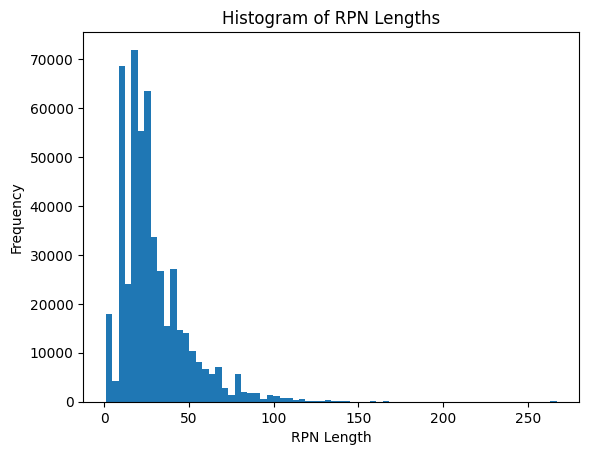

In [6]:
max_rpn_length = max(len(record['RPN']) for record in data)
print(f"The maximum length of any RPN key in data is: {max_rpn_length}")

# Find the record with the maximum length RPN key
max_length_record = max(data, key=lambda record: len(record['RPN']))

# Print the RPN and Skeleton keys for the record with the maximum length RPN key
print("RPN Key with Maximum Length:")
print(max_length_record['RPN'])
print("Skeleton Key for the Maximum Length RPN Key:")
print(max_length_record['Skeleton'])

#Can you plot a hisotrgram of lengths of RPN keys
rpn_lengths = [len(record['RPN']) for record in data]
plt.hist(rpn_lengths, bins=70)
plt.xlabel("RPN Length")
plt.ylabel("Frequency")
plt.title("Histogram of RPN Lengths")
plt.show()

## Tokenizer

In [7]:
import re

class MathTokenizer:
    def __init__(self, vocab=None):
        """
        If no vocabulary is provided, build a basic one including special tokens.
        You can later update the vocabulary by processing your entire dataset.
        """
        if vocab is None:
            # Special tokens: PAD, SOS (start of sequence), EOS (end of sequence), and UNK (unknown)
            self.vocab = {
                "<PAD>": 0,
                "<SOS>": 1,
                "<EOS>": 2,
                "<UNK>": 3,
            }
            # You can pre-populate the vocabulary with common tokens that appear in your RPN equations.
            for token in ["C", "x1", "sin", "cos", "exp", "log", "+", "-", "*", "/", "**"]:
                if token not in self.vocab:
                    self.vocab[token] = len(self.vocab)
        else:
            self.vocab = vocab
        # Create an inverse vocabulary for decoding.
        self.inv_vocab = {v: k for k, v in self.vocab.items()}

    def tokenize(self, expression):
        """
        Splits the RPN expression into tokens.
        Assumes tokens are separated by whitespace.
        For example, "C C x1 * C + sin * C +" becomes:
          ["C", "C", "x1", "*", "C", "+", "sin", "*", "C", "+"]
        """
        tokens = expression.strip().split()
        return tokens

    def build_vocab_from_list(self, expressions):
        """
        Given a list of RPN equation strings, update the vocabulary
        to include any token that is not already present.
        """
        for expr in expressions:
            tokens = self.tokenize(expr)
            for token in tokens:
                if token not in self.vocab:
                    self.vocab[token] = len(self.vocab)
        # Rebuild inverse vocabulary.
        self.inv_vocab = {v: k for k, v in self.vocab.items()}

    def encode(self, expression, add_special_tokens=True):
        """
        Tokenize and encode an RPN expression into a list of token IDs.
        Optionally add <SOS> at the beginning and <EOS> at the end.
        """
        tokens = self.tokenize(expression)
        token_ids = []
        if add_special_tokens:
            token_ids.append(self.vocab["<SOS>"])
        for token in tokens:
            # Use <UNK> if token not in vocab.
            token_ids.append(self.vocab.get(token, self.vocab["<UNK>"]))
        if add_special_tokens:
            token_ids.append(self.vocab["<EOS>"])
        return token_ids

    def decode(self, token_ids, remove_special_tokens=True):
        """
        Convert a list of token IDs back into a token sequence (string).
        Optionally remove special tokens (<SOS>, <EOS>, and <PAD>).
        """
        tokens = []
        for tid in token_ids:
            token = self.inv_vocab.get(tid, "<UNK>")
            if remove_special_tokens and token in ["<SOS>", "<EOS>", "<PAD>"]:
                continue
            tokens.append(token)
        return " ".join(tokens)

In [8]:
def tokenize_rpn_data(data):
    # Initialize tokenizer and build vocabulary from all RPN expressions
    tokenizer = MathTokenizer()
    
    # Extract all RPN expressions to build the vocabulary
    all_rpn_expressions = [record["RPN"] for record in data]
    tokenizer.build_vocab_from_list(all_rpn_expressions)
    
    # Print vocabulary size for reference
    print(f"Vocabulary size: {len(tokenizer.vocab)}")
    
    # Print the vocabulary and corresponding token
    for token, idx in tokenizer.vocab.items():
        print(f"Token: {token}, Index: {idx}")
    
    
    # Tokenize each RPN expression and add to a "token" key
    for record in data:
        # Tokenize without adding special tokens
        tokens = tokenizer.tokenize(record["RPN"])
        record["token"] = tokens
        
        # Also add the token IDs for potential model training
        token_ids = tokenizer.encode(record["RPN"], add_special_tokens=False)
        record["token_ids"] = token_ids
    
    # Sample check to verify tokenization
    sample_idx = 0
    print(f"\nSample tokenization (record {sample_idx}):")
    print(f"RPN: {data[sample_idx]['RPN']}")
    print(f"Tokens: {data[sample_idx]['token']}")
    print(f"Token IDs: {data[sample_idx]['token_ids']}")
    
    return data

# Apply tokenization
data = tokenize_rpn_data(data)

# Optionally, you can save the modified data to a new file
# with open('tokenized_data.json', 'w') as f:
#     json.dump(data, f)

print(f"\nTokenized {len(data)} records successfully.")

Vocabulary size: 22
Token: <PAD>, Index: 0
Token: <SOS>, Index: 1
Token: <EOS>, Index: 2
Token: <UNK>, Index: 3
Token: C, Index: 4
Token: x1, Index: 5
Token: sin, Index: 6
Token: cos, Index: 7
Token: exp, Index: 8
Token: log, Index: 9
Token: +, Index: 10
Token: -, Index: 11
Token: *, Index: 12
Token: /, Index: 13
Token: **, Index: 14
Token: 2, Index: 15
Token: 3, Index: 16
Token: 1, Index: 17
Token: 5, Index: 18
Token: 4, Index: 19
Token: 6, Index: 20
Token: 0, Index: 21

Sample tokenization (record 0):
RPN: C C x1 * cos * C +
Tokens: ['C', 'C', 'x1', '*', 'cos', '*', 'C', '+']
Token IDs: [4, 4, 5, 12, 7, 12, 4, 10]

Tokenized 496995 records successfully.


## Plot token length histogram, and then pre-process the data further to reduce the tokenized expression lengths

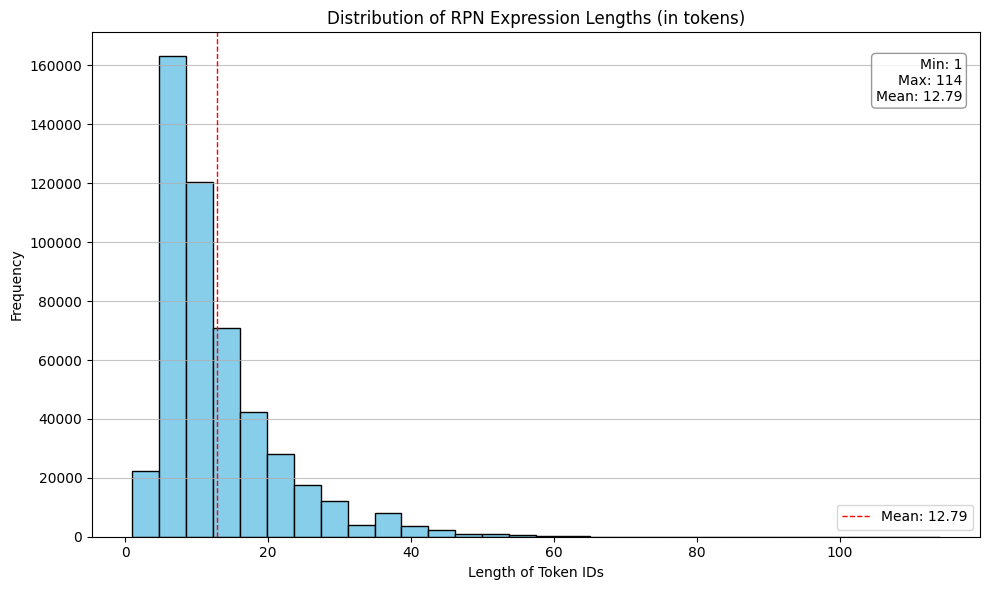

Statistics of token sequence lengths:
Minimum length: 1
Maximum length: 114
Average length: 12.79


In [9]:
# Create a histogram of token ID lengths
token_id_lengths = [len(record['token_ids']) for record in data]

plt.figure(figsize=(10, 6))
plt.hist(token_id_lengths, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Length of Token IDs')
plt.ylabel('Frequency')
plt.title('Distribution of RPN Expression Lengths (in tokens)')
plt.grid(axis='y', alpha=0.75)

# Add some statistics as text
avg_length = sum(token_id_lengths) / len(token_id_lengths)
max_length = max(token_id_lengths)
min_length = min(token_id_lengths)

plt.axvline(avg_length, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {avg_length:.2f}')
plt.legend()

plt.text(0.98, 0.95, f'Min: {min_length}\nMax: {max_length}\nMean: {avg_length:.2f}',
         transform=plt.gca().transAxes, horizontalalignment='right',
         verticalalignment='top', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

plt.tight_layout()
plt.show()

print(f"Statistics of token sequence lengths:")
print(f"Minimum length: {min_length}")
print(f"Maximum length: {max_length}")
print(f"Average length: {avg_length:.2f}")

In [10]:
# Print the original number of records
original_count = len(data)
print(f"Original number of records: {original_count}")

# Filter out records where token_ids length is greater than 25
data = [record for record in data if len(record['token_ids']) <= 25]

# Print the new number of records
new_count = len(data)
print(f"Number of records after filtering: {new_count}")

# Calculate the percentage of records removed
removed_percentage = ((original_count - new_count) / original_count) * 100
print(f"Removed {original_count - new_count} records ({removed_percentage:.2f}% of the dataset)")

Original number of records: 496995
Number of records after filtering: 456129
Removed 40866 records (8.22% of the dataset)


In [12]:
# Add padding to all token_ids and tokens in data
max_length = 25

for record in data:
    # Pad token_ids
    current_length = len(record['token_ids'])
    if current_length < max_length:
        # Pad with 0 (the ID for "<PAD>")
        padding = [0] * (max_length - current_length)
        record['token_ids'] = record['token_ids'] + padding
    
    # Pad tokens
    current_length = len(record['token'])
    if current_length < max_length:
        # Pad with "<PAD>" token
        padding = ["<PAD>"] * (max_length - current_length)
        record['token'] = record['token'] + padding

# Verify that padding was applied correctly
print(f"All token_ids have length 25: {all(len(record['token_ids']) == max_length for record in data)}")
print(f"All tokens have length 25: {all(len(record['token']) == max_length for record in data)}")

# Check a sample record before and after padding
sample_idx = 0
print(f"\nSample record token_ids length: {len(data[sample_idx]['token_ids'])}")
print(f"Sample record tokens length: {len(data[sample_idx]['token'])}")

# Display the sample record's tokens and token_ids
print("\nSample record tokens:")
print(data[sample_idx]['token'])
print("\nSample record token_ids:")
print(data[sample_idx]['token_ids'])

# Create a visual representation of tokens with their ids
print("\nMapping of tokens to token_ids:")
for token, token_id in zip(data[sample_idx]['token'], data[sample_idx]['token_ids']):
    print(f"{token} → {token_id}")

All token_ids have length 25: True
All tokens have length 25: True

Sample record token_ids length: 25
Sample record tokens length: 25

Sample record tokens:
['C', 'C', 'x1', '*', 'cos', '*', 'C', '+', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>', '<PAD>']

Sample record token_ids:
[4, 4, 5, 12, 7, 12, 4, 10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Mapping of tokens to token_ids:
C → 4
C → 4
x1 → 5
* → 12
cos → 7
* → 12
C → 4
+ → 10
<PAD> → 0
<PAD> → 0
<PAD> → 0
<PAD> → 0
<PAD> → 0
<PAD> → 0
<PAD> → 0
<PAD> → 0
<PAD> → 0
<PAD> → 0
<PAD> → 0
<PAD> → 0
<PAD> → 0
<PAD> → 0
<PAD> → 0
<PAD> → 0
<PAD> → 0
